# Jimmy Liang
SJSU 001869817
### CMPE 258 - HW3 - Part C3 - Tensorflow Keras


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

## Helper Classes

In [2]:
# 3D plot function

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  from sklearn.manifold import TSNE

  tsne = TSNE(n_components=2, random_state=0)
  x_2d = tsne.fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x_2d[:, 0], x_2d[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x_2d[:, 0], x_2d[:, 1], y_pred, label='our function')
  plt.legend()

## Generate some test data

x: (100, 3), weights1: (3, 1), bias1: (1,),   weights2: (3, 1), bias2: (1,), y1: (100, 1),   y2: (100, 1),y: (100, 2)


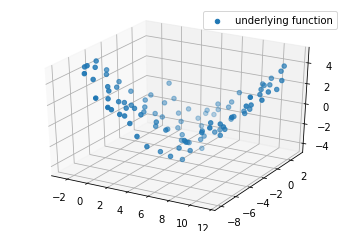

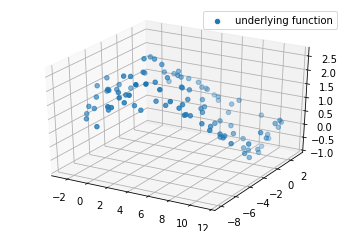

In [3]:

n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights1_true = np.array([[2, -1, 3], ]).T
weights2_true = np.array([[1, 0, -1], ]).T
bias1_true = np.array([0.5])
bias2_true = np.array([1])

y1_true = x @ weights1_true + bias1_true
y2_true = x @ weights2_true + bias2_true
y_true = np.hstack((y1_true, y2_true))


print(f'x: {x.shape}, weights1: {weights1_true.shape}, bias1: {bias1_true.shape}, \
  weights2: {weights2_true.shape}, bias2: {bias2_true.shape}, y1: {y1_true.shape}, \
  y2: {y2_true.shape},y: {y_true.shape}')

plot_3d(x, y_true[:,0])
plot_3d(x, y_true[:,1])

## Running the model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
regression (Dense)           (None, 2)                 22        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 2.7511
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.8346
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0923
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6492
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch

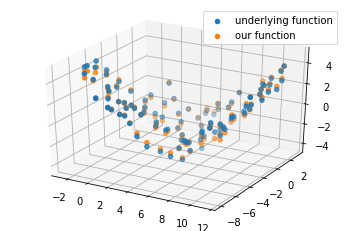

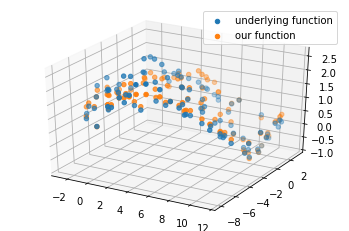

In [4]:
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(2, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true[:,0], y_pred[:,0])
plot_3d(x, y_true[:,1], y_pred[:,1])
